In [169]:
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
import matplotlib.pyplot as plt 
import datetime
import itertools
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

In [170]:
#Go though Web Export, split on ;
id = 1
label = ['Id','Banner','Item','Type','Rarity','Date']
rolls = pd.DataFrame(columns = label)
web_dir = "C:/Users/vzma/spring2021/CMSC320-Final-Tutorial/Data/WebExport"
for f in listdir(web_dir):
    if isfile(join(web_dir, f)):
        curr = pd.read_csv(join(web_dir, f))
        for index,line in curr.iterrows():
            temp = line[0].split(';')
            b = temp[0]
            if b=="Character Event":
                b = "Event"
            elif b=="Weapon Event":
                b = "Weapon"
            to_add = [id,b,temp[2],temp[3],temp[4],temp[5][:-1].replace('T', ' ')]
            rolls.loc[len(rolls.index)] = to_add
        id = id+1

In [171]:
#Go though External Export get rid of stars
ext_dir = "C:/Users/vzma/spring2021/CMSC320-Final-Tutorial/Data/ExternalExport"
b = ['Character Event Wish History', 'Permanent Wish History', 'Weapon Event Wish History', 'Novice Wish History']
for f in listdir(ext_dir):
    if isfile(join(ext_dir, f)):
        notebook = pd.ExcelFile(join(ext_dir, f))
        for sheet in b:
            curr = pd.read_excel(notebook,sheet_name=sheet)
            for index,line in curr.iterrows():
                to_add = [id,line['Banner'],line['Item Name'],line['Item Type'],len(line['Item Rarity']),line['Date and Time']]
                rolls.loc[len(rolls.index)] = to_add
        id = id+1

In [172]:
#Find Chinese document and figure out if it can be translated or just trash
name_dir = "C:/Users/vzma/spring2021/CMSC320-Final-Tutorial/Data/Export/rewardname"
b = ['Character Event Wish', 'Permanent Wish', 'Weapon Event Wish', 'Novice Wishes']
for f in listdir(name_dir):
    if isfile(join(name_dir, f)):
        notebook = pd.ExcelFile(join(name_dir, f))
        for sheet in b:
            curr = pd.read_excel(notebook,sheet_name=sheet)
            for index,line in curr.iterrows():
                to_add = [id,line['Banner'],line['Reward Name'],line['Reward Type'],line['Rarity (Star)'],line['Timestamp']]
                rolls.loc[len(rolls.index)] = to_add
        id = id+1

In [173]:
main_dir = "C:/Users/vzma/spring2021/CMSC320-Final-Tutorial/Data/Export/name"
b = ['Character Event Wish', 'Permanent Wish', 'Weapon Event Wish', 'Novice Wishes']
for f in listdir(main_dir):
    if isfile(join(main_dir, f)):
        notebook = pd.ExcelFile(join(main_dir, f))
        for sheet in b:
            curr = pd.read_excel(notebook,sheet_name=sheet)
            for index,line in curr.iterrows():
                to_add = [id,line['Banner'],line['name'],line['type'],line['rarity'],line['time']]
                rolls.loc[len(rolls.index)] = to_add
        id = id+1

In [174]:
rolls['Date'] = rolls['Date'].astype('datetime64[ns]')

In [193]:
rolls.loc[rolls['Id']==2].loc[rolls['Type']=='Weapon']['Rarity'].unique()

array(['3', '4', '5'], dtype=object)

In [176]:
weapons = pd.DataFrame(columns=['Item','Rarity','Count'])
temp = rolls.loc[rolls['Type']=='Weapon'].Item.unique()
for w in temp:
    r = rolls.loc[rolls['Item']==w]
    x = r['Rarity'].iloc[0]
    to_add = [w, x, len(r)]
    weapons.loc[len(weapons.index)] = to_add

In [177]:
weapons.sort_values(by='Count', ascending=False)

,Item,Rarity,Count
15,Skyrider Sword,3,1467
3,Bloodtainted Greatsword,3,1466
5,Sharpshooter's Oath,3,1463
7,Black Tassel,3,1414
2,Ferrous Shadow,3,1413
8,Slingshot,3,1388
4,Thrilling Tales of Dragon Slayers,3,1387
11,Emerald Orb,3,1365
6,Harbinger of Dawn,3,1358
0,Raven Bow,3,1348


In [178]:
characters = pd.DataFrame(columns=['Character','Rarity','Count'])
temp = rolls.loc[rolls['Type']=='Character'].Item.unique()
for w in temp:
    r = rolls.loc[rolls['Item']==w]
    x = r['Rarity'].iloc[0]
    to_add = [w, x, len(r)]
    characters.loc[len(characters.index)] = to_add

In [179]:
characters.sort_values(by='Count', ascending=False)

,Character,Rarity,Count
6,Xiangling,4,207
19,Xingqiu,4,160
0,Noelle,4,157
10,Sucrose,4,126
1,Chongyun,4,121
2,Fischl,4,117
16,Xinyan,4,111
18,Beidou,4,100
12,Barbara,4,95
14,Razor,4,88


In [180]:
#Heat map of items and version/banner? to show how common each item is
#line graph that shows number of rolls over time; demonstrate which banner is wanted most
#pi chart for each person
#histogram of pity

versions = {}
versions['v1.0'] = ["2020-09-28 00:00:00", "2020-11-11 16:00:00"]
versions['v1.1'] = ["2020-11-11 16:00:01", "2020-12-23 16:00:00"]
versions['v1.2'] = ["2020-12-23 16:00:01", "2021-02-03 16:00:00"]
versions['v1.3'] = ["2021-02-03 16:00:01", "2021-03-17 16:00:00"]
for key in versions.keys():
    start = datetime.datetime.strptime(versions[key][0], '%Y-%m-%d %H:%M:%S')
    end = datetime.datetime.strptime(versions[key][1], '%Y-%m-%d %H:%M:%S')
    
    versions[key] = [start, end]

charbanners = {}
charbanners['Venti'] = ["2020-09-28 00:00:00", "2020-10-18 16:00:00"]
charbanners['Klee'] = ["2020-10-18 16:00:01","2020-11-10 16:00:00"]
charbanners['Childe'] = ["2020-11-10 16:00:01","2020-11-30 16:00:00"]
charbanners['Zhongli'] = ["2020-11-30 16:00:01","2020-12-23 16:00:00"]
charbanners['Albedo'] = ["2020-12-23 16:00:01","2021-01-12 16:00:00"]
charbanners['Ganyu'] = ["2021-01-12 16:00:01","2021-02-02 16:00:00"]
charbanners['Xiao'] = ["2021-02-02 16:00:01","2021-02-17 16:00:00"]
charbanners['Keqing'] = ["2021-02-17 16:00:01","2021-03-02 16:00:00"]
charbanners['Hutao'] = ["2021-03-02 16:00:01","2021-03-17 16:00:00"]
charbanners['Venti2.0'] = ["2021-03-16 16:00:01","2021-04-06 16:00:00"]
for key in charbanners.keys():
    start = datetime.datetime.strptime(charbanners[key][0], '%Y-%m-%d %H:%M:%S')
    end = datetime.datetime.strptime(charbanners[key][1], '%Y-%m-%d %H:%M:%S')
    charbanners[key] = [start, end]

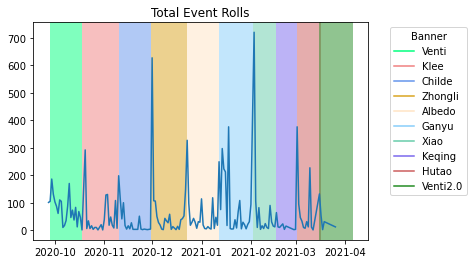

In [181]:
eventrolls = rolls.loc[rolls['Banner']=='Event']
eventrolls.sort_values(by='Date', ascending=False)
counter = {}
for index, row in eventrolls.iterrows():
    to_add = row['Date'].date()
    if to_add not in counter:
        counter[to_add] = 1
    else:
        counter[to_add] = counter[to_add] + 1
x = []
y = []

for key in counter.keys():
    x.append(key)
    y.append(counter[key])

x, y = zip(*sorted(zip(x, y)))
plt.plot(x, y)
plt.title("Total Event Rolls")
c = ['springgreen', 'lightcoral','cornflowerblue','goldenrod','bisque','lightskyblue','mediumaquamarine','mediumslateblue','indianred','forestgreen']

i=0
for k in charbanners.keys():
    plt.axvspan(charbanners[k][0].date(), charbanners[k][1].date(), color=c[i], alpha=0.5, lw=0)
    i=i+1

legend_elements = []
i=0
keys = list(charbanners.keys())
for i in range(len(c)):
    legend_elements.append(Line2D([0], [0],  color=c[i], label=keys[i], markersize=15))

plt.legend(handles=legend_elements, title='Banner', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

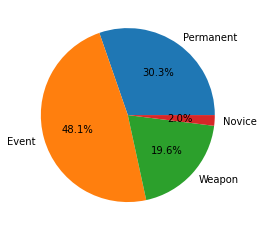

In [182]:
def func(pct):
    return "{:.1f}%".format(pct)

y = np.array([len(rolls.loc[rolls['Banner']=='Permanent']),len(rolls.loc[rolls['Banner']=='Event']),
                len(rolls.loc[rolls['Banner']=='Weapon']),len(rolls.loc[rolls['Banner']=='Novice'])])

l = ["Permanent", "Event", "Weapon","Novice"]
plt.pie(y, labels = l, autopct=lambda pct: func(pct))
plt.show() 

In [202]:
for x in range(1,22):
    curr = rolls.loc[rolls['Id']==x]
    event = curr.loc[curr['Banner'] =='Event'].groupby(['Type','Rarity']).count()
    weapon = curr.loc[curr['Banner'] =='Weapon'].groupby(['Type','Rarity']).count()
    perm = curr.loc[curr['Banner'] =='Permanent'].groupby(['Type','Rarity']).count()
    #novice = curr.loc[curr['Banner']=='Novice'].groupby(['Rarity', 'Type'])
    
    counter=pd.DataFrame(columns=['Banner','3* Weapon','4* Weapon','5* Weapon','4* Unit','5* Unit'])
    print(event)

                  Id  Banner  Item  Date
Type      Rarity                        
Character 4        9       9     9     9
          5        2       2     2     2
Weapon    3       77      77    77    77
          4        2       2     2     2
                   Id  Banner  Item  Date
Type      Rarity                         
Character 4        74      74    74    74
          5        13      13    13    13
Weapon    3       605     605   605   605
          4        24      24    24    24
                   Id  Banner  Item  Date
Type      Rarity                         
Character 4        39      39    39    39
          5         9       9     9     9
Weapon    3       397     397   397   397
          4        15      15    15    15
                   Id  Banner  Item  Date
Type      Rarity                         
Character 4        12      12    12    12
          5         2       2     2     2
Weapon    3       103     103   103   103
          4         3       3     3     